In [47]:
## Importamos modulos requeridos
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import shutil, os
from pandas import Series, DataFrame 
import pandas as pd
import pathlib
pd.set_option('max_rows',100000)
pd.set_option('max_colwidth',100000)
import urllib.request
import webbrowser
import re
import numpy as np
from time import sleep
import subprocess
from subprocess import Popen, PIPE, STDOUT
import shutil
from IPython.display import Image
from IPython.core.display import HTML
from datetime import datetime 

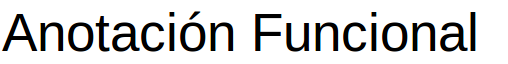

# 1. Anotacion de transcritos
# 2. Gráficos en R<br/>

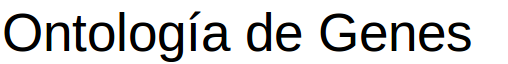

# IMPORTANTE
## Requerimientos para la Ontologia 
>### 1.- go.obo
>### 2.- OWLTools (Map2Slim)
>### 3.- GO slim (goslim_generic)
>### 4.- Proteoma en estudio (IDs Uniprot)
>### 5.- Archivo en formato GAF (Gene Association Format, GOC)
>### 6.- Transcritos
>### 7.- Blast

In [48]:
## creamos dos directorios, uno para las descargas y otro para los resultados
#os.makedirs('data',exist_ok=True)
#os.makedirs('results',exist_ok=True)
#os.makedirs('programs',exist_ok=True)

# 1.- Descargas (go.obo, OWLTools, GO slim y pseudo-GAF)<br/>

In [50]:
if os.path.exists("../data/Experimento1_GOslim/go.obo"): 
    print ('■■■ El archivo go.obo ya existe, no se descargará de la red')
    if os.path.exists("../data/Experimento2_GOslim_blast/all_go.txt"):
        print('■■■ El archivo all_go.txt ya existe')
    else:
        ## este aschivo sirve para generar un GAF nuevo
        output4=Popen("grep -e '^id: GO:' -e '^name: ' -e '^namespace: ' -e '.Typedef.' ../data/Experimento1_GOslim/go.obo | sed 's/id:/#id:/g' | perl -p -e 's/\n/\t/g' | sed 's/.Typedef.*//g' | perl -p -e 's/#/\n/g' | sed 's/id: //g; s/name: //g; s/namespace: //g' | sed '/^$/d' | sed 's/\t$//g' | sed 's/biological_process/P/g; s/molecular_function/F/g; s/cellular_component/C/g' | grep -v -e '\tC\tC' -v -e '\tF\tF' -v -e '\tP\tP' > ../data/Experimento2_GOslim_blast//all_go.txt",
              shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()        
else:
    ## descarga de la ontologia de genes
    output1=urllib.request.urlretrieve('http://snapshot.geneontology.org/ontology/go.obo','../data/Experimento2_GOslim_blast/go.obo')
    if os.path.exists("../data/Experimento2_GOslim_blast/all_go.txt"):
        print('■■■ El archivo all_go.txt ya existe')
    else:
        ## este aschivo sirve para generar un GAF nuevo
        output4=Popen("grep -e '^id: GO:' -e '^name: ' -e '^namespace: ' -e '.Typedef.' ../data/Experimento2_GOslim_blast/go.obo | sed 's/id:/#id:/g' | perl -p -e 's/\n/\t/g' | sed 's/.Typedef.*//g' | perl -p -e 's/#/\n/g' | sed 's/id: //g; s/name: //g; s/namespace: //g' | sed '/^$/d' | sed 's/\t$//g' | sed 's/biological_process/P/g; s/molecular_function/F/g; s/cellular_component/C/g' | grep -v -e '\tC\tC' -v -e '\tF\tF' -v -e '\tP\tP' > ../data/Experimento2_GOslim_blast/all_go.txt",
              shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()        
if os.path.exists("../data/Experimento1_GOslim/owltools"):
    print ('■■■ El programa owltools ya existe, no se descargará de la red')
else: 
    ## descarga de owltools, una herramienta multitarea, una de ellas es hacer GO_slim
    output2=urllib.request.urlretrieve('http://build.berkeleybop.org/userContent/owltools/owltools','../data/Experimento1_GOslim/owltools')
    !chmod +x ../data/Experimento1_GOslim/owltools
if os.path.exists("../data/Experimento1_GOslim/goslim_generic.txt"):
    print ('■■■ El archivo goslim_generic.txt ya existe, no se descargará de la red')
else:
    ## descargamos el go-slim desde el Gene Ontology Consortium
    output3=urllib.request.urlretrieve('ftp://ftp.geneontology.org/go/GO_slims/goslim_generic.obo','../data/Experimento2_GOslim_blast/goslim_generic.obo')
    ## Ahora le hacemos una ligera edicion para obtener tres columnas: GO ID, término y aspecto
    output4=Popen("grep -e '^id: GO:' -e '^name: ' -e '^namespace: ' -e '.Typedef.' ../data/Experimento2_GOslim_blast/goslim_generic.obo | sed 's/id:/#id:/g' | perl -p -e 's/\n/\t/g' | sed 's/.Typedef.*//g' | perl -p -e 's/#/\n/g' | sed 's/id: //g; s/name: //g; s/namespace: //g' | sed '/^$/d' | sed 's/\t$//g' | sed 's/biological_process/P/g; s/molecular_function/F/g; s/cellular_component/C/g' | grep -v -e '\tC\tC' -v -e '\tF\tF' -v -e '\tP\tP'  > ../data/Experimento2_GOslim_blast/goslim_generic.txt",
              shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()
    if os.path.exists("../data/Experimento2_GOslim_blast/goslim_generic.obo"): os.remove("../data/Experimento2_GOslim_blast/goslim_generic.obo")
if os.path.exists("../data/Experimento2_GOslim_blast/pseudo-GAF.pl"):
    ## El programa pseudo-GAF crea un archivo en formato GAF para que sea reconodido por OWLTools
    print ('■■■ El programa pseudo-GAF.pl ya existe, no se descargará de la red')
else: 
    ## descarga de owltools, una herramienta multitarea, una de ellas es hacer GO_slim
    output2=urllib.request.urlretrieve('https://raw.githubusercontent.com/eduardo1011/Programas/master/pseudo-GAF.pl','../data/Experimento2_GOslim_blast/pseudo-GAF.pl')

■■■ El archivo go.obo ya existe, no se descargará de la red
■■■ El archivo all_go.txt ya existe
■■■ El programa owltools ya existe, no se descargará de la red
■■■ El programa pseudo-GAF.pl ya existe, no se descargará de la red


# 2.- Transcriptoma en estudio (fasta) 
>## La lista de transcritos se obtuvo del siguiente articulo (*Calanus finmarchicus*)
http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0088589#s2

In [51]:
Image(url= "https://raw.githubusercontent.com/eduardo1011/Programas/master/trasncriptoma.png")

In [55]:
## Descarga del archivo fasta
output=urllib.request.urlretrieve('https://raw.githubusercontent.com/eduardo1011/Programas/master/710_trasnscritos_Calanus_finmarchicus.fasta','../data/Experimento2_GOslim_blast/710_trasnscritos_Calanus_finmarchicus.fasta')
#output=urllib.request.urlretrieve('https://raw.githubusercontent.com/eduardo1011/Programas/master/70_sequences_Calanus_finmarchicus.fasta','../data/Experimento2_GOslim_blast/70_sequences_Calanus_finmarchicus.fasta')

# 3.- Blastx

In [56]:
## Nombre de cada columna del resultado del blastx
header=("qacc","Protein_id","qlen","slen","length","score","bitscore","evalue","pident","nident",
                  "mismatch","positive","gaps","gapopen","stitle")

In [54]:
## Ejecutando el programa blastx (busca nucleotidos traducidos dentro en una base de datos de proteínas)
inicio = datetime.now()
#
!blastx -db /home/user2/Desktop/bigdata/swissprot \
-query ../data/Experimento2_GOslim_blast/710_trasnscritos_Calanus_finmarchicus.fasta \
-evalue 1E-6 -outfmt '6 qacc sacc qlen slen length score bitscore evalue pident nident mismatch positive gaps gapopen stitle' \
-max_target_seqs 1 \
-max_hsps 1 \
-out ../data/Experimento2_GOslim_blast/blastx
#
lapso = datetime.now() - inicio
print('\nTiempo (hh:mm:ss.ms) {}'.format(lapso)+'\n')


Tiempo (hh:mm:ss.ms) 1:03:44.555829



In [57]:
## Abrimos el resultado del blastx
blastx=pd.read_csv('../data/Experimento2_GOslim_blast/blastx',sep='\t',names=header)
print('\n',blastx[['qacc']].drop_duplicates().count().iloc[0],'transcritos')
print('\n',blastx[['Protein_id']].drop_duplicates().count().iloc[0],' proteinas')
blastx.head(5)


 439 transcritos

 175  proteinas


,qacc,Protein_id,qlen,slen,length,score,bitscore,evalue,pident,nident,mismatch,positive,gaps,gapopen,stitle
0,1001070759,P46595,347,147,113,507,199.0,1.860000e-66,87.611,99,14,108,0,0,RecName: Full=Ubiquitin-conjugating enzyme E2 4; AltName: Full=E2 ubiquitin-conjugating enzyme 4; AltName: Full=Ubiquitin carrier protein 4; AltName: Full=Ubiquitin-protein ligase 4
1,1001070758,Q9Y4A8,1665,694,111,196,80.1,1.810000e-14,43.243,48,61,72,2,1,"RecName: Full=Nuclear factor erythroid 2-related factor 3; Short=NF-E2-related factor 3; Short=NFE2-related factor 3; AltName: Full=Nuclear factor, erythroid derived 2, like 3"
2,1001070756,P22813,893,691,70,183,75.1,8.290000e-14,44.286,31,39,49,0,0,RecName: Full=Heat shock factor protein; Short=HSF; AltName: Full=Heat shock transcription factor; Short=HSTF
3,1001070755,P02833,1937,378,83,396,157.0,3.540000e-41,90.361,75,4,75,4,1,RecName: Full=Homeotic protein antennapedia
4,1001070754,G5E8K5,3729,1961,382,186,76.3,1.580000e-12,25.131,96,203,154,83,13,RecName: Full=Ankyrin-3; Short=ANK-3; AltName: Full=Ankyrin-G


In [ ]:
### Se puede aplicar un filtro antes de seguir con el analisis
#proteínas con >80% de identidad
#
#blastx=blastx[(blastx.pident >= 80) & (blastx.pident <= 100)].reset_index(drop=True).drop_duplicates()
#print('\n',blastx[['Protein_id']].drop_duplicates().count().iloc[0],' proteinas con identidad mayor al 80%')
#blastx.head(3)
print(blastx[(blastx.pident >= 80) & (blastx.pident <= 100)].reset_index(drop=True).drop_duplicates().count().iloc[0],' proteinas con identidad mayor al 80%')

# 4.- Obtencion de informacion funcional desde QuickGO

In [58]:
## Extraemos el "ID subject" del blastx y creamos una cadena para extraer informacion de QuickGO
ids_blastx=Popen("cut -f2 ../data/Experimento2_GOslim_blast/blastx | sort | uniq | perl -p -e 's/\n/%2C/g' | sed 's/%2C$//g'",
          shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read().decode()
print('\n',ids_blastx)


 A2BID7%2CA2VDU3%2CB1H369%2CD3Z7P3%2CE1BHC3%2CE2QWQ2%2CG5E8K5%2CG5EGQ3%2CO01382%2CO13224%2CO18598%2CO18635%2CO35737%2CO49596%2CO49597%2CO54750%2CO55071%2CO61443%2CO62619%2CO73630%2CO73888%2CO73919%2CO75179%2CO75521%2CO88664%2CO95983%2CO96017%2CP02512%2CP02833%2CP05179%2CP05627%2CP07668%2CP07953%2CP09087%2CP0CJ79%2CP11147%2CP12981%2CP15330%2CP16157%2CP20432%2CP20482%2CP21708%2CP22813%2CP25867%2CP26696%2CP27361%2CP28338%2CP28482%2CP28492%2CP29294%2CP29981%2CP30285%2CP31943%2CP32023%2CP34935%2CP35129%2CP35803%2CP37899%2CP38532%2CP40417%2CP41436%2CP41827%2CP42575%2CP42860%2CP42930%2CP46196%2CP46436%2CP46595%2CP49071%2CP49138%2CP49139%2CP52485%2CP52486%2CP52597%2CP52632%2CP52826%2CP54864%2CP56520%2CP56616%2CP62255%2CP62256%2CP68036%2CP82147%2CP83038%2CP89116%2CP92208%2CP97477%2CQ00534%2CQ00649%2CQ03013%2CQ04859%2CQ04864%2CQ05007%2CQ05713%2CQ08DJ8%2CQ08DZ2%2CQ09390%2CQ09660%2CQ12849%2CQ13075%2CQ13489%2CQ16539%2CQ19013%2CQ21355%2CQ24307%2CQ24537%2CQ26240%2CQ26430%2CQ28BP9%2CQ28DV3%2CQ293F6%2

In [59]:
## Extraemos informacion funcional de los productos de genes desde QuickGO
out=Popen("curl -X GET --header 'Accept:text/tsv' 'https://www.ebi.ac.uk/QuickGO/services/annotation/downloadSearch?geneProductId="+ids_blastx+"' > ../data/Experimento2_GOslim_blast/quickgo",
          shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()
## Abrimos el archivo descargado extraemos las columnas: entry GO-id
go_quickgo=pd.read_csv('../data/Experimento2_GOslim_blast/quickgo',sep='\t')
print('\n',go_quickgo[['GENE PRODUCT ID']].drop_duplicates().count().iloc[0],' productos de genes con GO')
go_quickgo.head(3)


 188  productos de genes con GO


,GENE PRODUCT DB,GENE PRODUCT ID,SYMBOL,QUALIFIER,GO TERM,GO ASPECT,ECO ID,GO EVIDENCE CODE,REFERENCE,WITH/FROM,TAXON ID,ASSIGNED BY,ANNOTATION EXTENSION,DATE
0,UniProtKB,A2BID7,prdm10,colocalizes_with,GO:0005634,C,ECO:0000318,IBA,PMID:21873635,MGI:MGI:104897|MGI:MGI:107690|MGI:MGI:2682313|PANTHER:PTN001228570|UniProtKB:Q13127|UniProtKB:Q7Z3K3|UniProtKB:Q8N8E2|UniProtKB:Q9H4Z2|UniProtKB:Q9Y4E5,7955,GO_Central,NaN,20180820
1,UniProtKB,A2BID7,prdm10,colocalizes_with,GO:0035097,C,ECO:0000318,IBA,PMID:21873635,MGI:MGI:2682313|PANTHER:PTN001228570|UniProtKB:Q9H4Z2,7955,GO_Central,NaN,20180820
2,UniProtKB,A2BID7,prdm10,enables,GO:0003676,F,ECO:0000256,IEA,GO_REF:0000002,InterPro:IPR013087,7955,InterPro,NaN,20180825


In [60]:
## Con un merge asignamos los GO-id a cada transcriito
subject_id=go_quickgo[['GENE PRODUCT ID','GO TERM']].rename(columns={'GENE PRODUCT ID':'Protein_id','GO TERM':'GO'}).drop_duplicates()
transcrito_go=blastx.merge(subject_id,on='Protein_id',how='left')[['qacc','Protein_id','GO']].drop_duplicates()
transcrito_go.head(10)

,qacc,Protein_id,GO
0,1001070759,P46595,GO:0000166
1,1001070759,P46595,GO:0004842
2,1001070759,P46595,GO:0005515
3,1001070759,P46595,GO:0005524
4,1001070759,P46595,GO:0016740
5,1001070759,P46595,GO:0031625
6,1001070759,P46595,GO:0061631
7,1001070759,P46595,GO:0000209
8,1001070759,P46595,GO:0006511
9,1001070759,P46595,GO:0016567


In [62]:
## Una forma de ver esta anotación funcional en QuickGO
quickgo_browser=Popen("cut -f2 ../data/Experimento2_GOslim_blast/blastx | sort | uniq | perl -p -e 's/\n/,/g' | sed 's/,$//g'",
          shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read().decode()
"https://www.ebi.ac.uk/QuickGO/annotations?geneProductId="+quickgo_browser
Popen("https://www.ebi.ac.uk/QuickGO/annotations?geneProductId="+quickgo_browser+"", shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()
webbrowser.open_new("https://www.ebi.ac.uk/QuickGO/annotations?geneProductId="+quickgo_browser+"")

False

In [61]:
"https://www.ebi.ac.uk/QuickGO/annotations?geneProductId="+quickgo_browser

'https://www.ebi.ac.uk/QuickGO/annotations?geneProductId=A2BID7,A2VDU3,B1H369,D3Z7P3,E1BHC3,E2QWQ2,G5E8K5,G5EGQ3,O01382,O13224,O18598,O18635,O35737,O49596,O49597,O54750,O55071,O61443,O62619,O73630,O73888,O73919,O75179,O75521,O88664,O95983,O96017,P02512,P02833,P05179,P05627,P07668,P07953,P09087,P0CJ79,P11147,P12981,P15330,P16157,P20432,P20482,P21708,P22813,P25867,P26696,P27361,P28338,P28482,P28492,P29294,P29981,P30285,P31943,P32023,P34935,P35129,P35803,P37899,P38532,P40417,P41436,P41827,P42575,P42860,P42930,P46196,P46436,P46595,P49071,P49138,P49139,P52485,P52486,P52597,P52632,P52826,P54864,P56520,P56616,P62255,P62256,P68036,P82147,P83038,P89116,P92208,P97477,Q00534,Q00649,Q03013,Q04859,Q04864,Q05007,Q05713,Q08DJ8,Q08DZ2,Q09390,Q09660,Q12849,Q13075,Q13489,Q16539,Q19013,Q21355,Q24307,Q24537,Q26240,Q26430,Q28BP9,Q28DV3,Q293F6,Q3SZF3,Q3T149,Q3U1V8,Q3U3Q1,Q4UMH6,Q4V7Q6,Q4V8V1,Q5E9J6,Q5R5I4,Q5RKH1,Q5UEM7,Q5ZJ60,Q5ZJH6,Q62073,Q62210,Q62829,Q63844,Q64261,Q64303,Q69ZU8,Q6CVH3,Q6R7M4,Q70PY2,Q794E

# 5.- Creamos un archivo pseudo-GAF compatible con OWLTools (en este paso cada transcrito ya tiene asignado un GO term)

In [65]:
## Para crear un archivo en formato GAF es necesario tener un archivo "gene association"
## Creamos un archivo "gene association" con el siguiente formato
df1=transcrito_go.pivot_table(values='GO',index=['Protein_id'],aggfunc=sum).reset_index()
df2=df1[['GO']].replace({'GO':';GO'},regex=True).replace({'$':';'},regex=True).replace({'^;':''},regex=True)
df3=pd.concat([df1[['Protein_id']],df2[['GO']]],axis=1,join='outer')
df3.to_csv('../data/Experimento2_GOslim_blast/Gene_association.txt',sep='\t',header=None,index=None)
print('\nEl archivo "gene association" debe tener la siguiente estructura')
df3.head(3)    


El archivo "gene association" debe tener la siguiente estructura


,Protein_id,GO
0,A2BID7,GO:0005634;GO:0035097;GO:0003676;GO:0003677;GO:0008168;GO:0016740;GO:0046872;GO:0010468;GO:0032259;
1,A2VDU3,GO:0000166;GO:0000287;GO:0004672;GO:0004674;GO:0004709;GO:0005524;GO:0016301;GO:0016740;GO:0030971;GO:0042802;GO:0046872;GO:0097110;GO:0000186;GO:0000187;GO:0002726;GO:0006468;GO:0006915;GO:0007165;GO:0007250;GO:0007252;GO:0007254;GO:0016310;GO:0032743;GO:0043123;GO:0043507;GO:0043966;GO:0051403;GO:0005671;GO:0005737;GO:0005886;GO:0008385;GO:0016020;
2,B1H369,GO:0004407;GO:0016787;GO:0032041;GO:0046872;GO:0006325;GO:0016575;GO:0045944;GO:0070932;GO:0070933;GO:0000118;GO:0005634;GO:0005737;


In [67]:
## Creamos un archivo pseudo-gaf con el programa pseudo-GAF.pl
output4=Popen("perl ../data/Experimento2_GOslim_blast/pseudo-GAF.pl ../data/Experimento2_GOslim_blast/all_go.txt ../data/Experimento2_GOslim_blast/Gene_association.txt > ../data/Experimento2_GOslim_blast/pseudo_gaf_Transcritos.gaf",
              shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()
pseudo_gaf=pd.read_csv('../data/Experimento2_GOslim_blast/pseudo_gaf_Transcritos.gaf',sep='\t',header=None)
pseudo_gaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DB,A2BID7,A2BID7,,GO:0005634,PMID:foo,TAS,,C,A2BID7,,protein,taxon:1000,20180903,DB,,
1,DB,A2BID7,A2BID7,,GO:0035097,PMID:foo,TAS,,C,A2BID7,,protein,taxon:1000,20180903,DB,,
2,DB,A2BID7,A2BID7,,GO:0003676,PMID:foo,TAS,,F,A2BID7,,protein,taxon:1000,20180903,DB,,
3,DB,A2BID7,A2BID7,,GO:0003677,PMID:foo,TAS,,F,A2BID7,,protein,taxon:1000,20180903,DB,,
4,DB,A2BID7,A2BID7,,GO:0008168,PMID:foo,TAS,,F,A2BID7,,protein,taxon:1000,20180903,DB,,


 ## 6.- Creando un GO slim usando Map2Slim: una opcion de OWLTools
>### Map2slim usa un fichero GO slim y un fichero .GAF, el script mapea los terminos del .GAF (anotacion completa) en los terminos del  GO slim creando una version corta de la ontologia.

In [ ]:
## ejecutamos owltools
!../data/Experimento1_GOslim/owltools ../data/Experimento1_GOslim/go.obo --gaf ../data/Experimento2_GOslim_blast/pseudo_gaf_Transcritos.gaf --map2slim --idfile ../data/Experimento1_GOslim/goslim_generic.txt --write-gaf ../data/Experimento2_GOslim_blast/my_transcritos.gaf > progress
!rm progress

In [70]:
## filtramos filas sin ! (caracteristico de ficheros GAF) y extraemos las columnas 2 y 5 con qacc y GO
output7 = Popen("grep -v '!' ../data/Experimento2_GOslim_blast/my_transcritos.gaf | cut -f2,5 > ../data/Experimento2_GOslim_blast/slim_transcritos", shell=True,
                stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True).stdout.read()
## abrimos el fichero slim y lo asignamos
my_trans_gaf_goslim=pd.read_table('../data/Experimento2_GOslim_blast/slim_transcritos', names=['Entry','GO']).drop_duplicates().reset_index(drop=True)
print(my_trans_gaf_goslim.count(),'\n')
print(my_trans_gaf_goslim[1:10])

Entry    2254
GO       2254
dtype: int64 

    Entry          GO
1  A2BID7  GO:0005654
2  A2BID7  GO:0032991
3  A2BID7  GO:0003677
4  A2BID7  GO:0008168
5  A2BID7  GO:0043167
6  Q94527  GO:0000228
7  Q94527  GO:0003700
8  Q94527  GO:0003677
9  Q94527  GO:0006950


In [71]:
## abrimos el GO slim especifico (yeast en este caso)y lo asignamos
goslim_specific=pd.read_table('../data/Experimento2_GOslim_blast//goslim_generic.txt',names=['GO','Term','Aspect'])
goslim_specific.head()

,GO,Term,Aspect
0,GO:0000003,reproduction,P
1,GO:0000228,nuclear chromosome,C
2,GO:0000229,cytoplasmic chromosome,C
3,GO:0000278,mitotic cell cycle,P
4,GO:0000902,cell morphogenesis,P


### Ahora le asignaremos el termino a cada transcrito

In [72]:
## asignacion de terminos y aspecto a cada proteina del proteoma en estudio
transcritos_go_term=pd.merge(my_trans_gaf_goslim,goslim_specific,on="GO",how='left').drop_duplicates()#.fillna('N')
transcritos_go_term.head()

,Entry,GO,Term,Aspect
0,A2BID7,GO:0005634,nucleus,C
1,A2BID7,GO:0005654,nucleoplasm,C
2,A2BID7,GO:0032991,protein-containing complex,C
3,A2BID7,GO:0003677,DNA binding,F
4,A2BID7,GO:0008168,methyltransferase activity,F


# Resultados
### Ahora extraemos extraemos transcritos y sus categorias<br/>

## Funcion molecular

In [73]:
## Molecular Function
func=transcritos_go_term[['GO','Term','Aspect']].groupby(['Aspect']).get_group('F')
function=func.groupby(['GO','Term']).count().reset_index().rename(columns={"Term": "Molecular Function","Aspect": "Value"}).sort_values(by ='Value',ascending=False).reset_index(drop=True)
mayor_A_10=function[(function.Value >= 10)]
menor_A_10=function[(function.Value < 10)]
otros_terminos={'GO':['GOs'],'Molecular Function':['Other Functions'],'Value':[sum(menor_A_10.Value)]}
terminos=pd.DataFrame(otros_terminos)
others=pd.concat([mayor_A_10,terminos[['GO','Molecular Function','Value']]],axis=0)
others.to_csv('../data/Experimento2_GOslim_blast/Molecular_Function.csv',index=None)
others#.head()

,GO,Molecular Function,Value
0,GO:0043167,ion binding,96
1,GO:0019899,enzyme binding,44
2,GO:0016301,kinase activity,43
3,GO:0003700,DNA-binding transcription factor activity,39
4,GO:0003677,DNA binding,36
5,GO:0008233,peptidase activity,21
6,GO:0016491,oxidoreductase activity,18
7,GO:0008134,transcription factor binding,17
8,GO:0016765,"transferase activity, transferring alkyl or aryl (other than methyl) groups",13
9,GO:0016810,"hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds",12


In [74]:
## matriz para ver intersecciones entre terminos
up_function=transcritos_go_term[transcritos_go_term.Aspect.str.contains("F")==True]
upset_function=up_function.pivot_table(values="Term",index=["Entry"],aggfunc=len,columns="GO").fillna('0').reset_index()
upset_function.to_csv('../data/Experimento2_GOslim_blast/Molecular_Function_matrix.csv',index=None)
upset_function.head()

GO,Entry,GO:0003677,GO:0003700,GO:0003723,GO:0003729,GO:0003924,GO:0004518,GO:0005198,GO:0008092,GO:0008134,...,GO:0016853,GO:0016874,GO:0016887,GO:0019899,GO:0022857,GO:0030234,GO:0030674,GO:0032182,GO:0043167,GO:0051082
0,A2BID7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,A2VDU3,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,B1H369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,D3Z7P3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,E1BHC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Proceso biologico

In [75]:
## Biological Process
pros=transcritos_go_term[['GO','Term','Aspect']].groupby(['Aspect']).get_group('P')
process=pros.groupby(['GO','Term']).count().reset_index().rename(columns={"Term": "Biological Process","Aspect": "Value"}).sort_values(by ='Value',ascending=False).reset_index(drop=True)
mayor_A_10=process[(process.Value >= 22)]
menor_A_10=process[(process.Value < 22)]
otros_terminos={'GO':['GOs'],'Biological Process':['Other Processes'],'Value':[sum(menor_A_10.Value)]}
terminos=pd.DataFrame(otros_terminos)
others=pd.concat([mayor_A_10,terminos[['GO','Biological Process','Value']]],axis=0)
others.to_csv('../data/Experimento2_GOslim_blast/Biological_Process.csv',index=None)
others#.head()

,GO,Biological Process,Value
0,GO:0009058,biosynthetic process,83
1,GO:0007165,signal transduction,81
2,GO:0006464,cellular protein modification process,76
3,GO:0034641,cellular nitrogen compound metabolic process,74
4,GO:0006950,response to stress,70
5,GO:0048856,anatomical structure development,64
6,GO:0022607,cellular component assembly,47
7,GO:0030154,cell differentiation,46
8,GO:0008219,cell death,39
9,GO:0009056,catabolic process,35


In [76]:
## matriz para ver intersecciones entre terminos
up_process=transcritos_go_term[transcritos_go_term.Aspect.str.contains("P")==True]
upset_process=up_process.pivot_table(values="Term",index=["Entry"],aggfunc=len,columns="GO").fillna('0').reset_index()
upset_process.to_csv('../data/Experimento2_GOslim_blast/Biological_Process_matrix.csv',index=None)
upset_process.head()

GO,Entry,GO:0000003,GO:0000902,GO:0002376,GO:0003013,GO:0005975,GO:0006091,GO:0006259,GO:0006397,GO:0006399,...,GO:0048856,GO:0048870,GO:0050877,GO:0051186,GO:0051276,GO:0051301,GO:0051604,GO:0055085,GO:0061024,GO:0065003
0,A2VDU3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,B1H369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,D3Z7P3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,E1BHC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,E2QWQ2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Componente celular

In [77]:
## Cellular Component
comp=transcritos_go_term[['GO','Term','Aspect']].groupby(['Aspect']).get_group('C')
component=comp.groupby(['GO','Term']).count().reset_index().rename(columns={"Term": "Cellular Component","Aspect": "Value"}).sort_values(by ='Value',ascending=False).reset_index(drop=True)
mayor_A_10=component[(component.Value >= 10)]
menor_A_10=component[(component.Value < 10)]
otros_terminos={'GO':['GOs'],'Cellular Component':['Other Components'],'Value':[sum(menor_A_10.Value)]}
terminos=pd.DataFrame(otros_terminos)
others=pd.concat([mayor_A_10,terminos[['GO','Cellular Component','Value']]],axis=0)
others.to_csv('../data/Experimento2_GOslim_blast/Cellular_Component.csv',index=None)
others#.head()

,GO,Cellular Component,Value
0,GO:0005634,nucleus,103
1,GO:0005737,cytoplasm,102
2,GO:0005622,intracellular,67
3,GO:0005829,cytosol,54
4,GO:0032991,protein-containing complex,49
5,GO:0005654,nucleoplasm,48
6,GO:0005886,plasma membrane,35
7,GO:0043226,organelle,26
8,GO:0005856,cytoskeleton,23
9,GO:0000228,nuclear chromosome,23


In [78]:
## matriz para ver intersecciones entre terminos
up_component=transcritos_go_term[transcritos_go_term.Aspect.str.contains("C")==True]
upset_component=up_component.pivot_table(values="Term",index=["Entry"],aggfunc=len,columns="GO").fillna('0').reset_index()
upset_component.to_csv('../data/Experimento2_GOslim_blast/Cellular_Component_matrix.csv',index=None)
upset_component.head()

GO,Entry,GO:0000228,GO:0005576,GO:0005615,GO:0005622,GO:0005623,GO:0005634,GO:0005635,GO:0005654,GO:0005694,...,GO:0005811,GO:0005815,GO:0005829,GO:0005856,GO:0005886,GO:0005929,GO:0031012,GO:0031410,GO:0032991,GO:0043226
0,A2BID7,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,A2VDU3,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,B1H369,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,D3Z7P3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,E1BHC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.- Transcritos anotados y no anotados

In [79]:
all_go=pd.read_csv('../data/Experimento2_GOslim_blast/all_go.txt',sep='\t',names=['GO','Term','Aspect'])
transcritos_anotados=pd.merge(transcrito_go,all_go,on="GO",how='left').drop_duplicates()

In [80]:
## de todas las proteinas sabemos cuantas tienen anotacion en Uniprot
nan=transcritos_anotados[transcritos_anotados['GO'].isnull()].reset_index(drop=True) ## proteinas que no tienen GO
print('Transcritos no anotados: ',nan['Protein_id'].drop_duplicates().count(),'\n')
print(nan[['Protein_id']].head())

Transcritos no anotados:  0 

Empty DataFrame
Columns: [Protein_id]
Index: []


In [81]:
## solo las proteinas que tienen GO
no_nan=transcritos_anotados[transcritos_anotados['GO'].notnull()].reset_index(drop=True) 
print('\nTranscritos con anotacion: ',no_nan['qacc'].drop_duplicates().count(),'\n')
print('Proteinas anotadas: ',no_nan['Protein_id'].drop_duplicates().count(),'\n')
print(no_nan[['qacc','Protein_id']].drop_duplicates().reset_index(drop=True).head(),'\n.......')


Transcritos con anotacion:  439 

Proteinas anotadas:  175 

         qacc Protein_id
0  1001070759     P46595
1  1001070758     Q9Y4A8
2  1001070756     P22813
3  1001070755     P02833
4  1001070754     G5E8K5 
.......


In [84]:
## Para no inflar los resultados se toman las proteinas identificadas, ya que en algunos casos mas de dos transcritos
## corresponden para un tipo de proteina
sin_con=[nan['Protein_id'].drop_duplicates().reset_index(drop=True).rename(),no_nan['Protein_id'].drop_duplicates().reset_index(drop=True).rename()]
singo_congo=pd.concat(sin_con, axis=1,ignore_index=False).rename(columns={0:'Without GO',1:'Whith GO'},index=str, inplace=False)
singo_congo.count().to_csv('../data/Experimento2_GOslim_blast/Anotadas.csv')
singo_congo[['Without GO','Whith GO']].count()

Without GO      0
Whith GO      175
dtype: int64

In [85]:
sin_nan=transcritos_anotados[['Protein_id','GO','Term','Aspect']].drop_duplicates()
frec=sin_nan.pivot_table(values="GO",index=["Protein_id"],aggfunc=len,columns="Aspect").reset_index()
frec#.to_csv('./results/Categories_frequences.csv',header=True,index=None)
frec[['F','C','P']].count().to_csv('../data/Experimento2_GOslim_blast/Total_categories_CFP.csv',header=None)
print('Total de terminos por categoria\n')
print(frec[['F','C','P']].count())

Total de terminos por categoria

Aspect
F    171
C    158
P    165
dtype: int64


In [86]:
## Archivo para generar un diagrama de Venn, intersecciones entre categorias, total de proteinas por categoria
ff=transcritos_anotados[transcritos_anotados.Aspect.str.contains("F")==True]
pp=transcritos_anotados[transcritos_anotados.Aspect.str.contains("P")==True]
cc=transcritos_anotados[transcritos_anotados.Aspect.str.contains("C")==True]
cats=[pp[['Protein_id']],ff[['Protein_id']],cc[['Protein_id']]]
categorias=pd.concat(cats, axis=1, ignore_index=True).rename(columns={0:"Process",1:'Function',2:'Component'},index=str).drop_duplicates().reset_index(drop=True)
categorias.to_csv('../data/Experimento2_GOslim_blast/cats.csv',index=None) 
categorias.head()

,Process,Function,Component
0,NaN,P46595,NaN
1,P46595,NaN,NaN
2,NaN,NaN,P46595
3,NaN,Q9Y4A8,NaN
4,Q9Y4A8,NaN,NaN
